In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pickle
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.misc import imresize


In [3]:
from keras.models import Sequential
from keras.layers import Activation, Dropout,UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [4]:
images = pickle.load(open("/content/drive/MyDrive/Lane detection/full_CNN_train.p",'rb'))
labels = pickle.load(open("/content/drive/MyDrive/Lane detection/full_CNN_labels.p",'rb'))

In [5]:
images = np.array(images)
labels = np.array(labels)

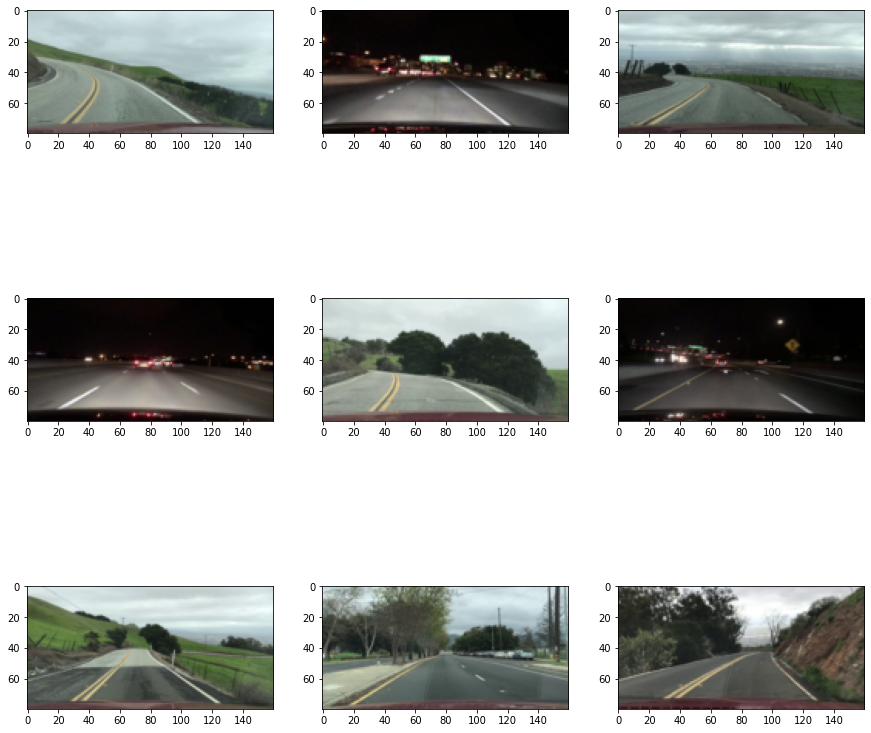

In [6]:
fig, axes = plt.subplots(3, 3, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(1400)
        img = np.array(images[index])
        axe.imshow(img)

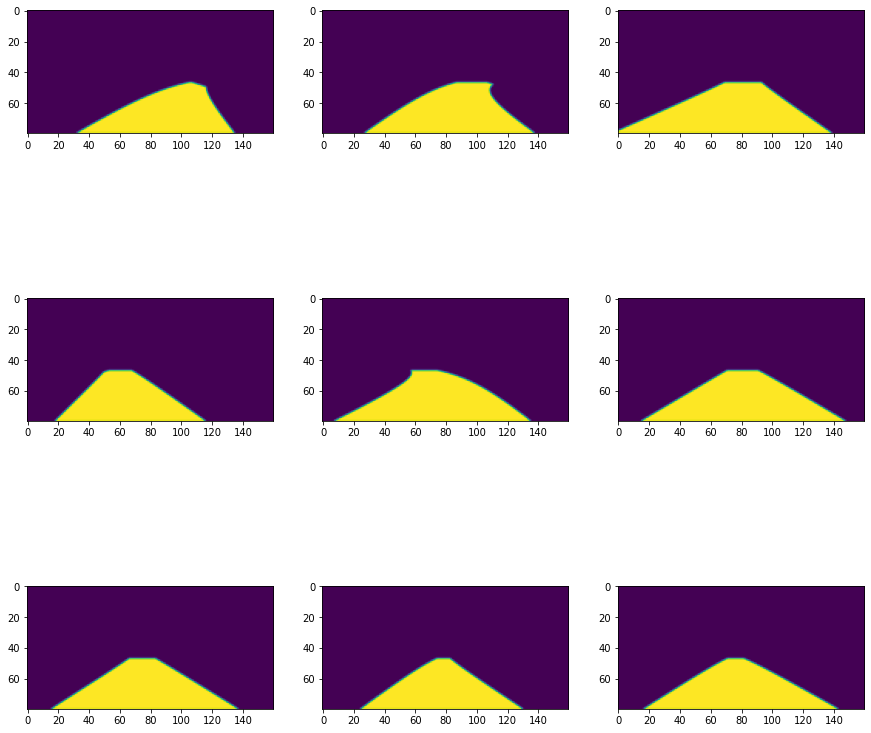

In [7]:
fig, axes = plt.subplots(3, 3, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(1400)
        img = np.array(labels[index].reshape(80,160))
        axe.imshow(img)

In [8]:
labels = labels/255

In [9]:
images, labels = shuffle(images,labels)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2)

In [11]:
datagen = ImageDataGenerator(channel_shift_range=0.2)
datagen.fit(X_train)

In [12]:
X_train.shape

(10211, 80, 160, 3)

In [13]:
'''
model = Sequential()
# Normalizes incoming inputs. First layer needs the input shape to work
model.add(BatchNormalization(input_shape=(80,160,3)))
model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'))
model.add(Conv2D(16, (3, 3), padding="same",strides=(1,1), activation="relu"))
model.add(Conv2D(32, (3, 3), padding="same", strides=(1,1), activation="relu"))

#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(UpSampling2D(size=(2,2)))
#model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu'))
#model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu'))
model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu'))
'''

'\nmodel = Sequential()\n# Normalizes incoming inputs. First layer needs the input shape to work\nmodel.add(BatchNormalization(input_shape=(80,160,3)))\nmodel.add(Conv2D(8, (3, 3), padding=\'valid\', strides=(1,1), activation = \'relu\', name = \'Conv1\'))\nmodel.add(Conv2D(16, (3, 3), padding="same",strides=(1,1), activation="relu"))\nmodel.add(Conv2D(32, (3, 3), padding="same", strides=(1,1), activation="relu"))\n\n#model.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n#model.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(UpSampling2D(size=(2,2)))\n#model.add(Conv2DTranspose(32, (3, 3), padding=\'valid\', strides=(1,1), activation = \'relu\'))\n#model.add(Conv2DTranspose(16, (3, 3), padding=\'valid\', strides=(1,1), activation = \'relu\'))\nmodel.add(Conv2DTranspose(1, (3, 3), padding=\'valid\', strides=(1,1), activation = \'relu\'))\n'

In [14]:
#imresize(labels, (12764,72, 152,1))

In [15]:
labels.shape

(12764, 80, 160, 1)

In [16]:

pool_size = (2,2)
input_shape = (80,160,3)
model = Sequential()
    # Normalizes incoming inputs. First layer needs the input shape to work
model.add(BatchNormalization(input_shape=input_shape))

    # Below layers were re-named for easier reading of model summary; this not necessary
    # Conv Layer 1
model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'))

    # Conv Layer 2
model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'))

    # Pooling 1
model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 3
model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'))
model.add(Dropout(0.2))

    # Conv Layer 4
model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'))
model.add(Dropout(0.2))

    # Conv Layer 5
model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'))
model.add(Dropout(0.2))

    # Pooling 2
model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 6
model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'))
model.add(Dropout(0.2))

    # Conv Layer 7
model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'))
model.add(Dropout(0.2))

    # Pooling 3
model.add(MaxPooling2D(pool_size=pool_size))

    # Upsample 1
model.add(UpSampling2D(size=pool_size))

    # Deconv 1
model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'))
model.add(Dropout(0.2))

    # Deconv 2
model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'))
model.add(Dropout(0.2))

    # Upsample 2
model.add(UpSampling2D(size=pool_size))

    # Deconv 3
model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'))
model.add(Dropout(0.2))

    # Deconv 4
model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'))
model.add(Dropout(0.2))

    # Deconv 5
model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'))
model.add(Dropout(0.2))

    # Upsample 3
model.add(UpSampling2D(size=pool_size))

    # Deconv 6
model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'))

    # Final layer - only including one channel so 1 filter
model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 80, 160, 3)       12        
 ormalization)                                                   
                                                                 
 Conv1 (Conv2D)              (None, 78, 158, 8)        224       
                                                                 
 Conv2 (Conv2D)              (None, 76, 156, 16)       1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 38, 78, 16)       0         
 )                                                               
                                                                 
 Conv3 (Conv2D)              (None, 36, 76, 16)        2320      
                                                                 
 dropout (Dropout)           (None, 36, 76, 16)        0

In [18]:
lr_red = ReduceLROnPlateau(monitor = 'val_loss',min_lr = 0.0001,factor = 0.25,patience = 2,verbose = 1)
es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 4,verbose = 1)

In [19]:
model.compile(optimizer='Adam', loss='mean_squared_error',metrics = 'accuracy')

In [20]:
history = model.fit(datagen.flow(X_train,y_train),epochs = 25,validation_data = (X_val,y_val),callbacks = [lr_red,es])

Epoch 1/25
320/320 [==============================] - 41s 106ms/step - loss: 0.0261 - accuracy: 0.9391 - val_loss: 0.0115 - val_accuracy: 0.9552 - lr: 0.0010
Epoch 2/25
320/320 [==============================] - 32s 100ms/step - loss: 0.0103 - accuracy: 0.9557 - val_loss: 0.0083 - val_accuracy: 0.9573 - lr: 0.0010
Epoch 3/25
320/320 [==============================] - 32s 101ms/step - loss: 0.0088 - accuracy: 0.9567 - val_loss: 0.0078 - val_accuracy: 0.9579 - lr: 0.0010
Epoch 4/25
320/320 [==============================] - 32s 100ms/step - loss: 0.0081 - accuracy: 0.9572 - val_loss: 0.0072 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 5/25
320/320 [==============================] - 32s 99ms/step - loss: 0.0080 - accuracy: 0.9573 - val_loss: 0.0071 - val_accuracy: 0.9584 - lr: 0.0010
Epoch 6/25
320/320 [==============================] - 32s 99ms/step - loss: 0.0076 - accuracy: 0.9577 - val_loss: 0.0069 - val_accuracy: 0.9587 - lr: 0.0010
Epoch 7/25
320/320 [==============================] - 

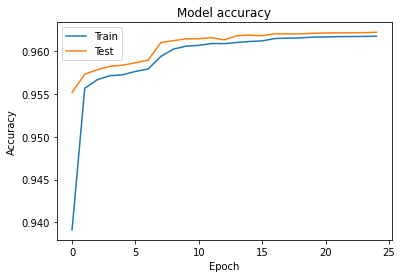

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

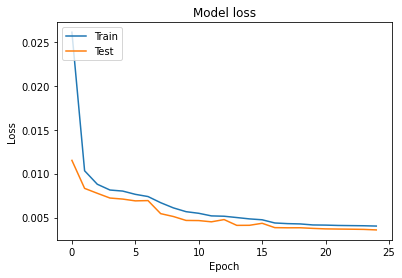

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
model.save('Lane_detection.h5')